<a href="https://colab.research.google.com/github/Utu8848/Unveiling-Patterns-in-Medical-Premiums-A-Random-Forest-Study/blob/main/Unveiling_Patterns_in_Medical_Premiums_A_Random_Forest_Based_Exploratory_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Initial Data Loading and Basic Exploration of Dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy import stats

# Loading the dataset
df = pd.read_csv('Medicalpremium.csv')

# Displaying basic information
print("=== Dataset Information ===")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print("\nFirst 5 rows:")
print(df.head())

=== Dataset Information ===
Shape: (986, 11)

Columns: ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']

Data types:
Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

First 5 rows:
   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                

#2. Duplicate Removal and Feature Engineering: Calculating BMI

In [ ]:
# Checking for duplicates
initial_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicates before processing: {initial_duplicates}")

# Checking for duplicates after preprocessing
final_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicates after processing: {final_duplicates}")

# Removing duplicates if any
if final_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {final_duplicates} duplicates")

# Featuring engineering - BMI calculation
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

# Checking the updated dataframe
print("\n=== Data after Preprocessing ===")
print(df.head())


Number of duplicates before processing: 0

Number of duplicates after processing: 0

=== Data after Preprocessing ===
   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  Premiu

#3. Data Quality Assessment and Analysis


=== Missing Values ===
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
BMI                        0
dtype: int64

=== Descriptive Statistics ===
              Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max    

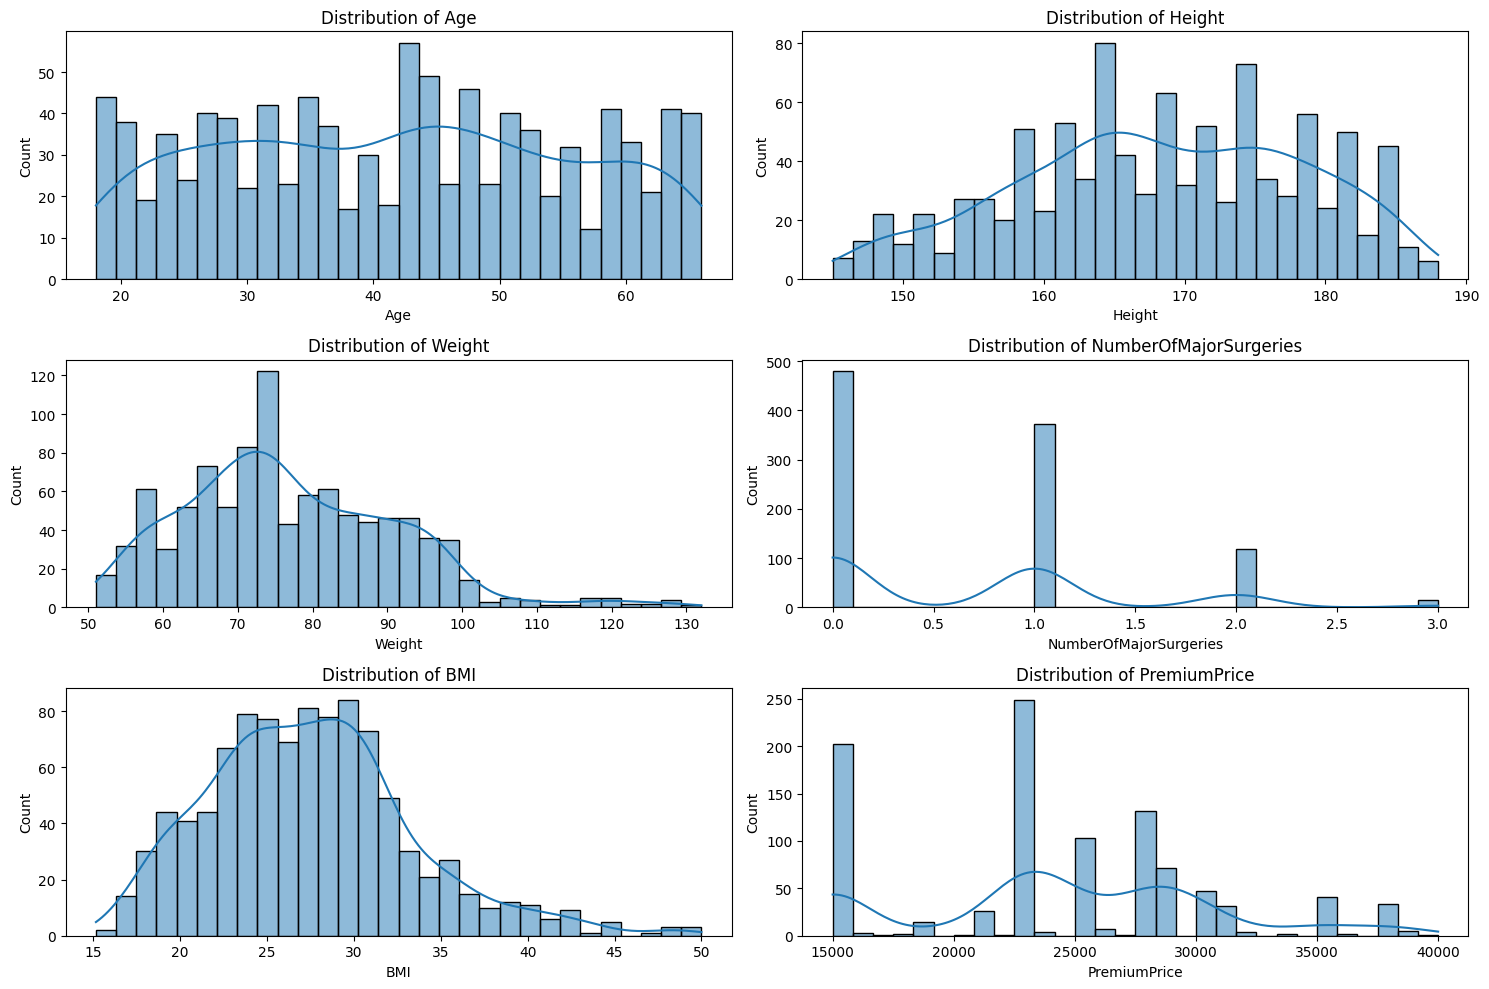

--------------------------------------------------------------------------------------------------------------------


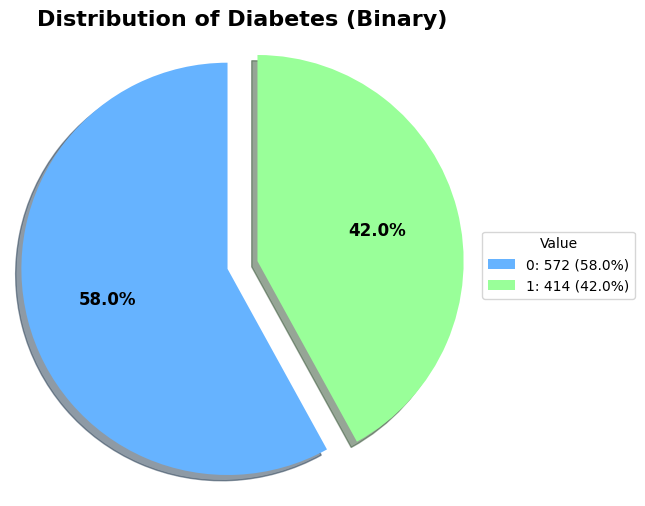

--------------------------------------------------------------------------------------------------------------------


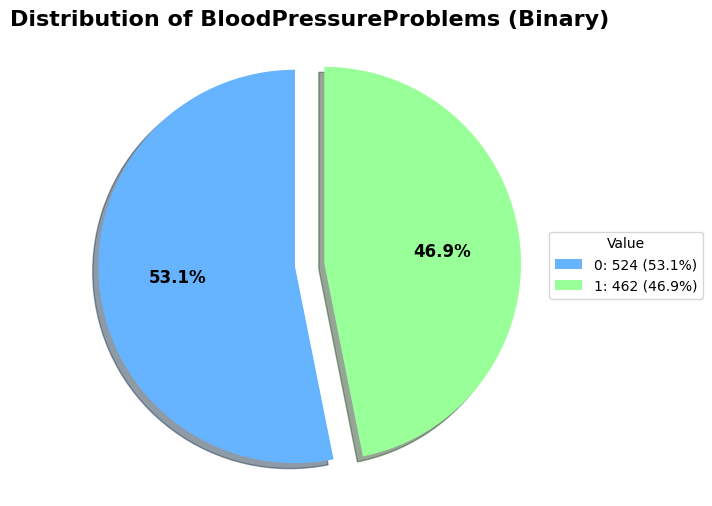

--------------------------------------------------------------------------------------------------------------------


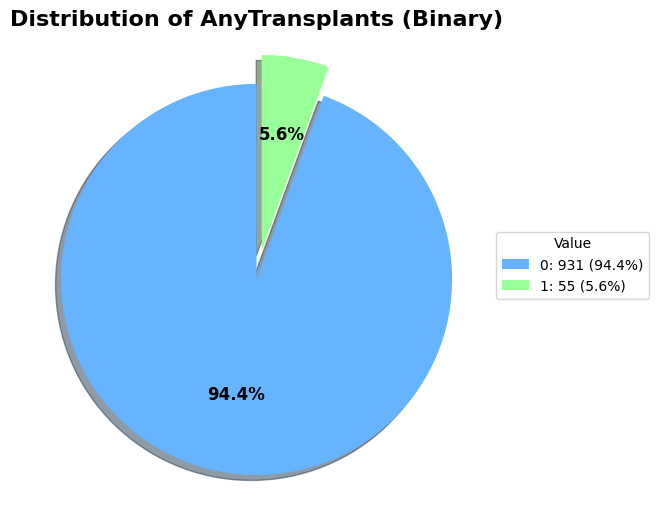

--------------------------------------------------------------------------------------------------------------------


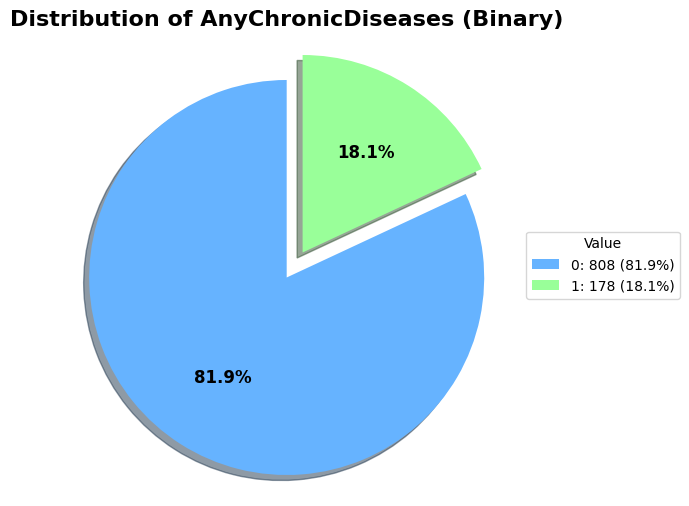

--------------------------------------------------------------------------------------------------------------------


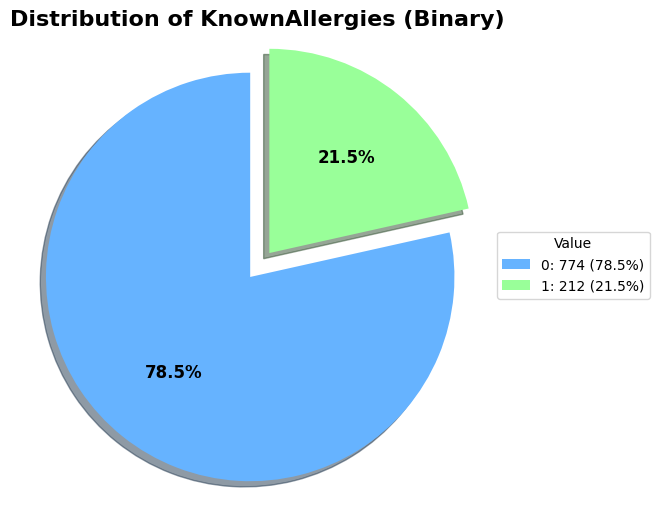

--------------------------------------------------------------------------------------------------------------------


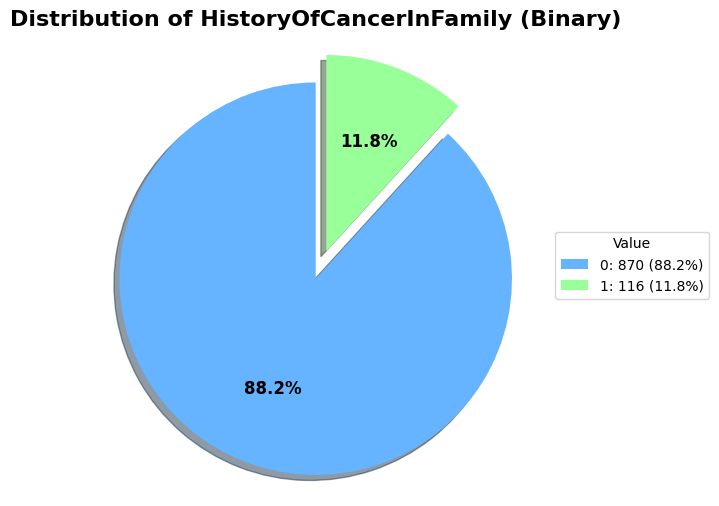

--------------------------------------------------------------------------------------------------------------------


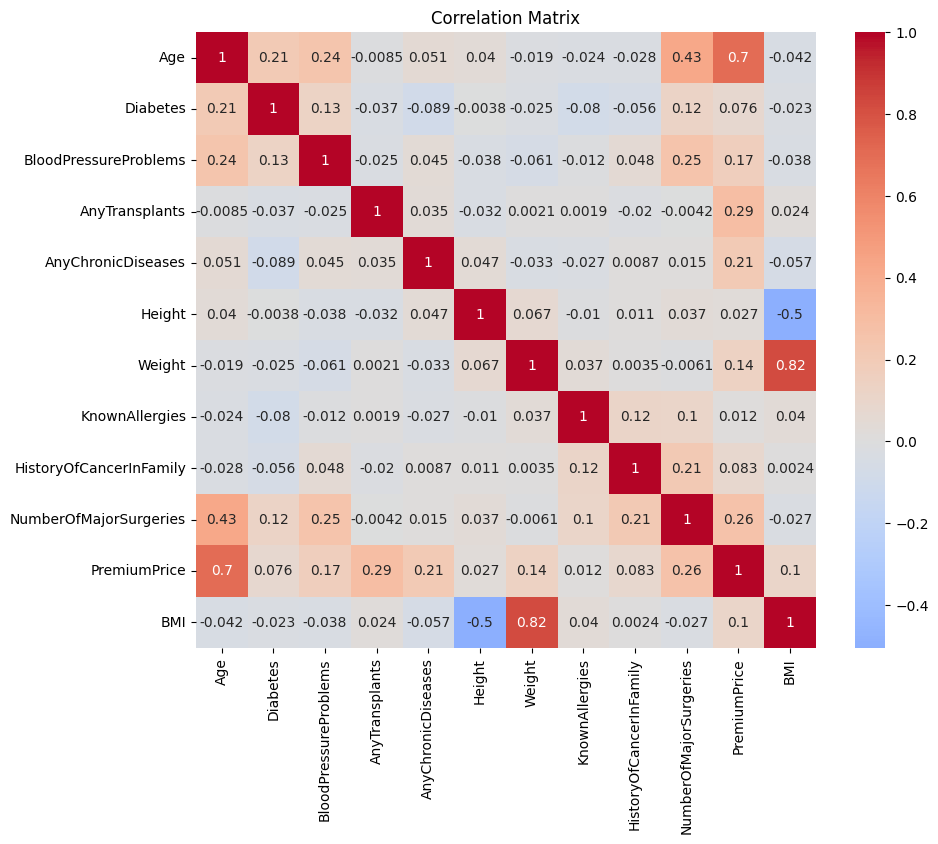

In [ ]:
# Checking for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Basic statistics
print("\n=== Descriptive Statistics ===")
print(df.describe())

# Correlation analysis
print("\n=== Correlation Matrix ===")
corr_matrix = df.corr()
print(corr_matrix['PremiumPrice'].sort_values(ascending=False))

# Visualize data distribution
numeric_cols = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'BMI', 'PremiumPrice']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
print("--------------------------------------------------------------------------------------------------------------------")

# Identifying binary columns (0/1 values)
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]

colors = ['#66b3ff', '#99ff99']
explode = (0.05, 0.1)  # Slightly pulling out both slices for emphasis

for col in binary_cols:
    plt.figure(figsize=(6,6))
    counts = df[col].value_counts().sort_index()
    total = counts.sum()

    # Pie chart without labels, only autopct for percentage inside slices
    wedges, texts, autotexts = plt.pie(
        counts,
        autopct='%1.1f%%',
        explode=explode,
        shadow=True,
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'}
    )

    # Creating legend labels with count and percentage
    legend_labels = [f'0: {counts[0]} ({counts[0]/total*100:.1f}%)',
                     f'1: {counts[1]} ({counts[1]/total*100:.1f}%)']

    plt.title(f'Distribution of {col} (Binary)', fontsize=16, weight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures pie is circular
    plt.legend(wedges, legend_labels, title="Value", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()
    print("--------------------------------------------------------------------------------------------------------------------")

# Visualizing correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#4. Outlier Detection and Treatment Using Winsorization


=== Outlier Detection ===


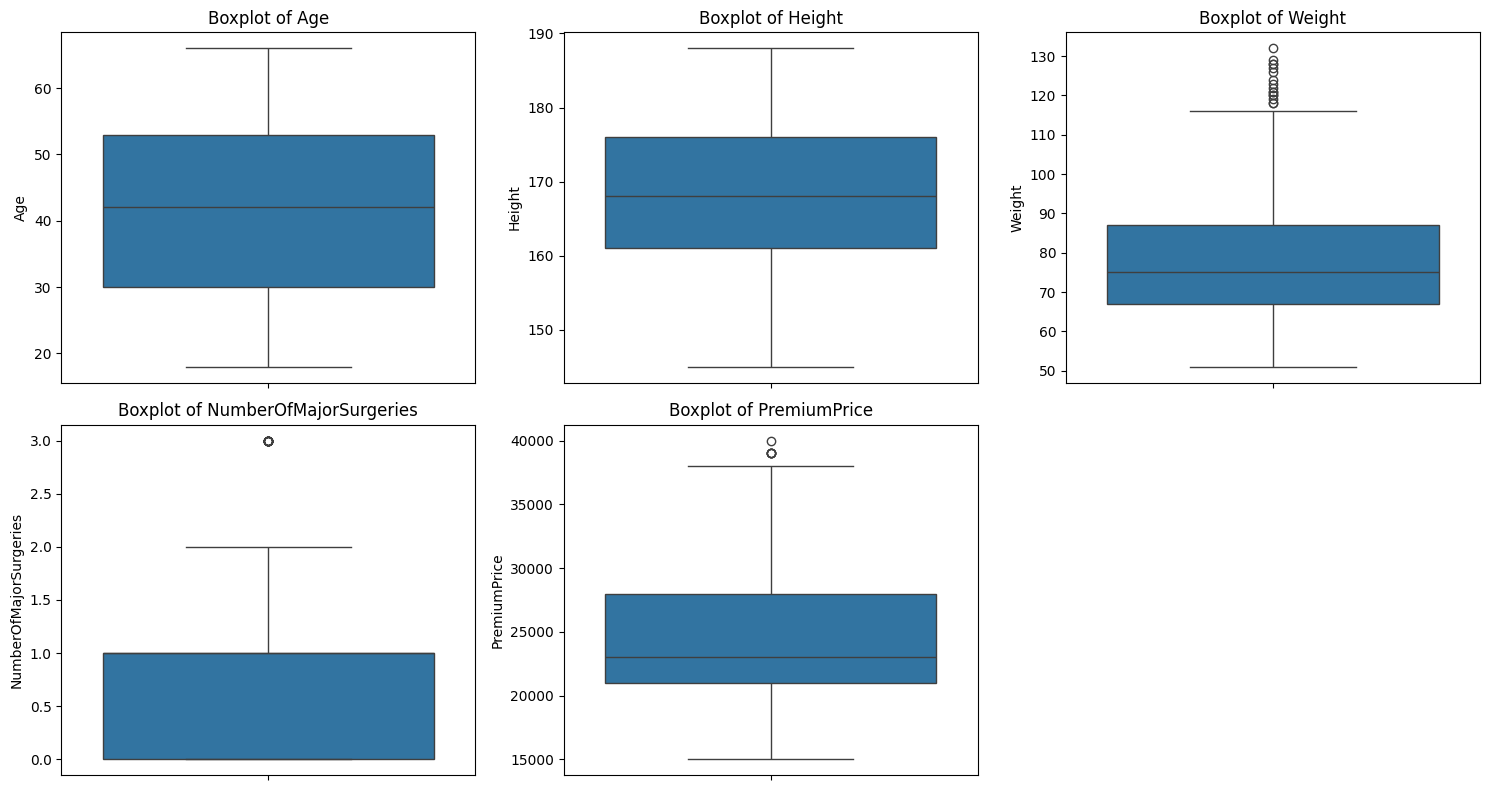


Number of outliers before handling (Z-score > 3):
Age: 0
Height: 0
Weight: 13
NumberOfMajorSurgeries: 16
PremiumPrice: 0

=== After Outlier Handling ===


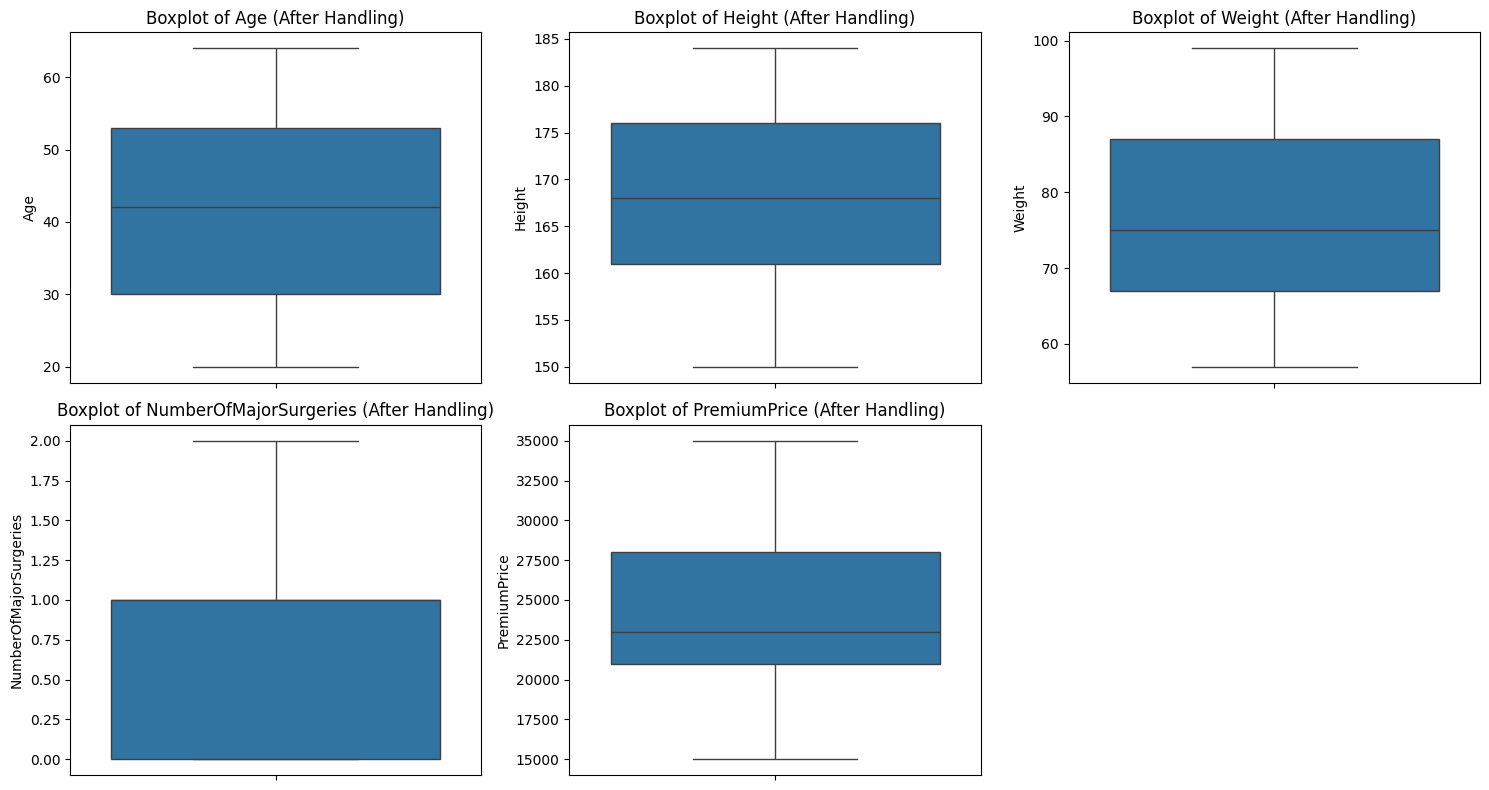


Number of outliers after handling (Z-score > 3):
Age: 0
Height: 0
Weight: 0
NumberOfMajorSurgeries: 0
PremiumPrice: 0


In [ ]:
# Outlier detection before handling
print("\n=== Outlier Detection ===")
numeric_cols = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Calculating number of outliers using Z-score
print("\nNumber of outliers before handling (Z-score > 3):")
for col in numeric_cols:
    z_scores = stats.zscore(df[col])
    outliers = np.where(np.abs(z_scores) > 3)
    print(f"{col}: {len(outliers[0])}")

# Handling outliers - Winsorization
for col in numeric_cols:
    q1 = df[col].quantile(0.05)
    q3 = df[col].quantile(0.95)
    df[col] = np.where(df[col] < q1, q1, df[col])
    df[col] = np.where(df[col] > q3, q3, df[col])

# Outlier detection after handling
print("\n=== After Outlier Handling ===")
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After Handling)')
plt.tight_layout()
plt.show()

# Calculating number of outliers after handling
print("\nNumber of outliers after handling (Z-score > 3):")
for col in numeric_cols:
    z_scores = stats.zscore(df[col])
    outliers = np.where(np.abs(z_scores) > 3)
    print(f"{col}: {len(outliers[0])}")

#5. Random Forest Regression Model Training, Evaluation, and Feature Importance Analysis
**Reminder**: Since hyperparameter tuning is used, might take little longer to execute.

In [ ]:
# Preparing data for modeling
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initializing GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=1)

# Fitting GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Best estimator from grid search
best_model = grid_search.best_estimator_
print(f"\nBest hyperparameters: {grid_search.best_params_}")

# Making predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluating the best model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Model Evaluation After Hyperparameter Tuning ===")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Accuracy (R^2 Score): {r2:.4f}")

# Getting feature importances from the best model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

=== Model Evaluation After Hyperparameter Tuning ===
Mean Squared Error: 3964784.56
Root Mean Squared Error: 1991.18
Accuracy (R^2 Score): 0.8990

Feature Importances:
                    Feature  Importance
0                       Age    0.700777
3            AnyTransplants    0.071362
6                    Weight    0.070653
4        AnyChronicDiseases    0.039736
10                      BMI    0.035320
9    NumberOfMajorSurgeries    0.029170
8   HistoryOfCancerInFamily    0.023267
5                    Height    0.019317
2     BloodPressureProblems    0.006089
1                  Diabetes    0.003290
7            KnownAllergies    0.001019


#6. Model Performance Visualization: Actual vs Predicted, Residual Analysis, and Feature Importance

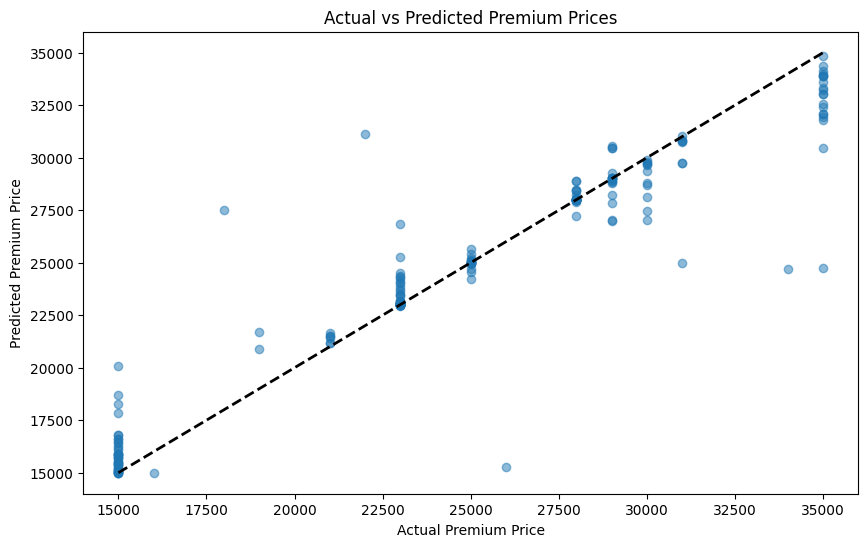

---------------------------------------------------------------------------------------------------------------


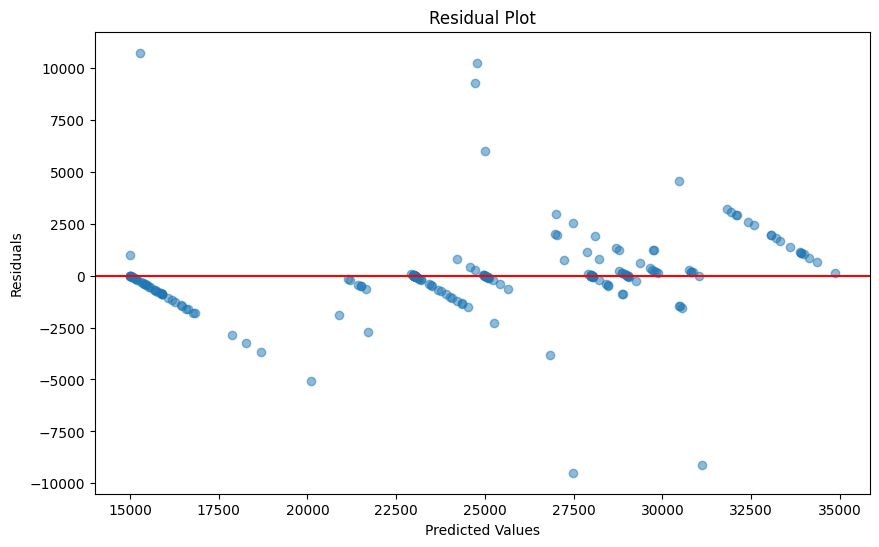

---------------------------------------------------------------------------------------------------------------


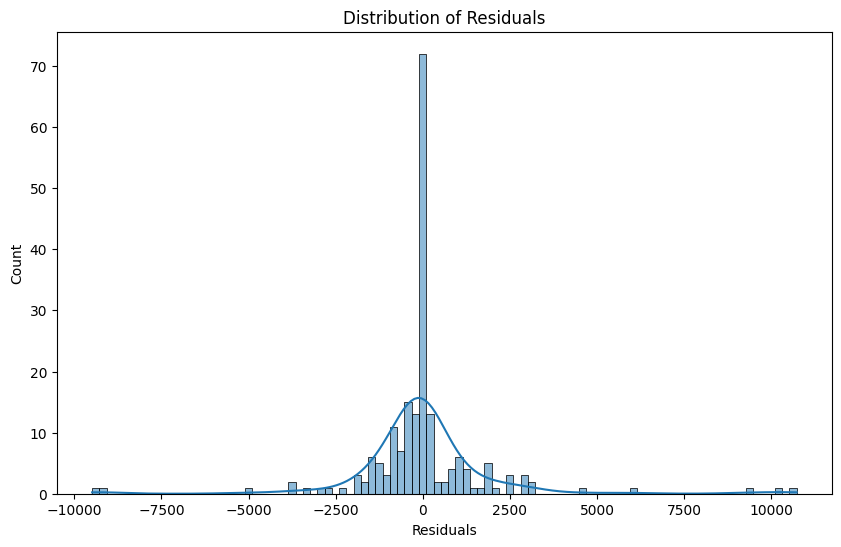

---------------------------------------------------------------------------------------------------------------


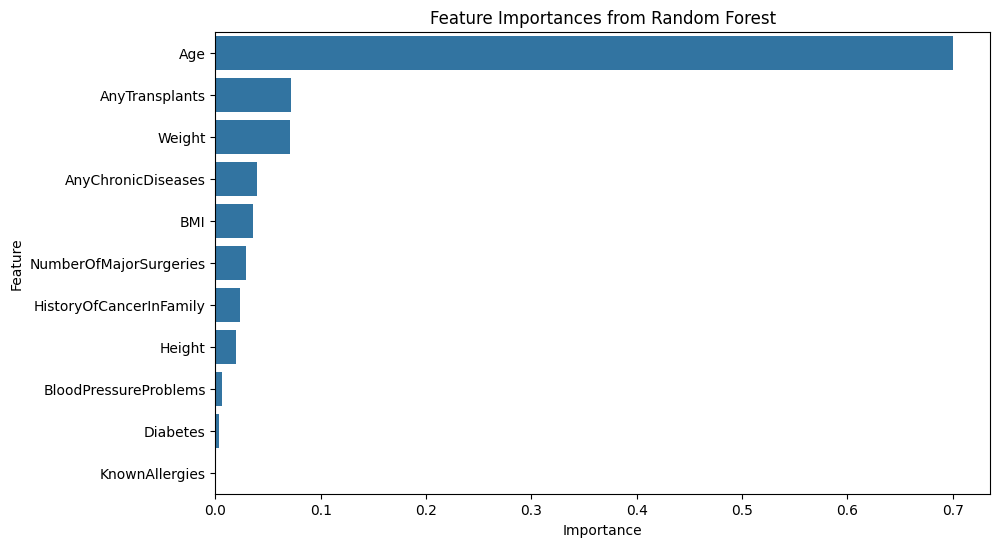

In [ ]:
# Actual vs Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Premium Price')
plt.ylabel('Predicted Premium Price')
plt.title('Actual vs Predicted Premium Prices')
plt.show()
print("---------------------------------------------------------------------------------------------------------------")
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
print("---------------------------------------------------------------------------------------------------------------")
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
print("---------------------------------------------------------------------------------------------------------------")
# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()